In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [20]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [22]:
 train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [23]:
train.isnull().sum()
test.isnull().sum()

,0
employee_id,0
department,0
region,0
education,1034
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,1812
length_of_service,0


<Axes: xlabel='age', ylabel='Count'>

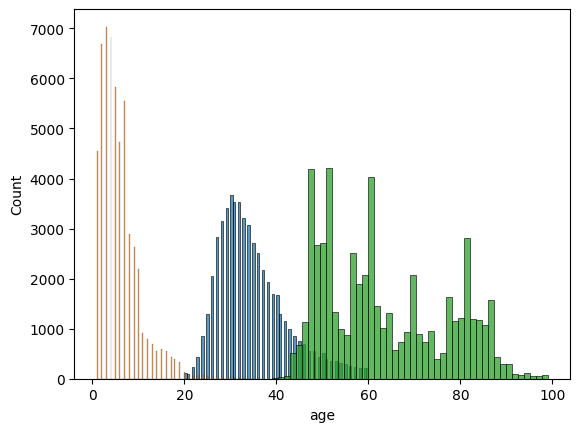

In [24]:
sns.histplot(train['age'])
sns.histplot(train['length_of_service'])
sns.histplot(train['avg_training_score'])


In [25]:
train['education'].fillna(train['education'].mode()[0], inplace=True)
train['previous_year_rating'].fillna(train['previous_year_rating'].mode()[0], inplace=True)

<ipython-input-25-f20a13599d15>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['education'].fillna(train['education'].mode()[0], inplace=True)
<ipython-input-25-f20a13599d15>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_columns = ['department', 'region', 'education', 'gender', 'recruitment_channel']

# Impute missing values in categorical columns of the test set with the mode from the train set
for col in categorical_columns:
    if test[col].isnull().any():
        # Get the mode from the training data
        mode_value = train[col].mode()[0]
        # Fill NaN in the test data
        test[col].fillna(mode_value, inplace=True)

for col in categorical_columns:
    # Fit on train and transform both train and test
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])

<ipython-input-26-aa639d72c49a>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test[col].fillna(mode_value, inplace=True)


In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_columns = ['age', 'length_of_service', 'no_of_trainings', 'previous_year_rating', 'avg_training_score']
train[numerical_columns] = scaler.fit_transform(train[numerical_columns])
test[numerical_columns] = scaler.transform(test[numerical_columns])

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train.drop(columns=['employee_id', 'is_promoted']),
                                                  train['is_promoted'], test_size=0.2, random_state=42)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Install catboost if not already installed
try:
    from catboost import CatBoostClassifier
except ModuleNotFoundError:
    !pip install catboost
    from catboost import CatBoostClassifier # Import after installation

X = train.drop(columns=['employee_id', 'is_promoted'])
y = train['is_promoted']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0)

}

In [30]:
f1_scores = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    f1 = f1_score(y_val, y_pred)
    f1_scores[model_name] = f1

# Display F1 scores
f1_scores

{'Logistic Regression': 0.11811811811811812,
 'Random Forest': 0.4110929853181077,
 'Gradient Boosting': 0.44556962025316454,
 'XGBoost': 0.49842767295597484,
 'CatBoost': 0.48026315789473684}

In [31]:
# prompt: predict the best model

# Find the model with the highest F1 score
best_model_name = max(f1_scores, key=f1_scores.get)
best_model = models[best_model_name]

print(f"The best model is: {best_model_name} with an F1 score of {f1_scores[best_model_name]:.4f}")

# You can now use 'best_model' for predictions on the test set

The best model is: XGBoost with an F1 score of 0.4984


In [32]:

test_predictions = best_model.predict(test.drop(columns=['employee_id']))


if 'is_promoted' not in test.columns:
    test['is_promoted'] = test_predictions
else:
    test['is_promoted'] = test_predictions

# Display the first few rows of the modified test DataFrame
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,8724,8,18,0,1,2,-0.415276,-1.410415,NaN,-1.140785,1,0,1.018084,0
1,74430,2,28,0,0,0,-0.415276,-0.496588,-0.250651,-0.202931,0,0,-0.926359,0
2,72255,7,4,0,1,0,-0.415276,-0.496588,-1.897069,-0.437395,0,0,-1.225504,0
3,38562,5,11,0,0,0,2.867403,-0.496588,-1.073860,0.734923,0,0,0.120649,0
4,64486,1,21,0,1,2,-0.415276,-0.627135,0.572557,0.265996,0,0,-0.178496,0


In [44]:
# prompt: Save this new dataset as a csv file

test[['employee_id', 'is_promoted']].to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' created successfully.")

Submission file 'submission.csv' created successfully.
